In [2]:
#
# TASK 3: Linear Discriminant Analysis (LDA)  [30 Minutes]
# 
# Dataset: "nndb_flat.csv"
# 
# Task to carry out:  Apply LDA to the USDA dataset described in Task 2. Compare the result 
# with what  you got from Task 2. 
#

In [8]:
############################################################################
#                                                                          #
#                          Load and process data                           #
#                                                                          #
############################################################################

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("nndb_flat.csv", index_col=0)

# Drop columns that are entirely NaN, that way we can drop NaN values without dropping the entire data frame.
df.drop(columns=["CommonName", "MfgName", "ScientificName"], inplace=True)
df.dropna()

# Drop outcome variable and string variables from feature set
X = df.drop(columns=["FoodGroup", "ShortDescrip", "Descrip"])

# Select target variable 
y = df.FoodGroup
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Inspect shape of X to see it currently has 38 features
print(f"\nShape of X: {X.shape} \n")


Shape of X: (8618, 38) 



C:\Users\laesc\AppData\Local\Temp\ipykernel_19028\236941044.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('plasma')


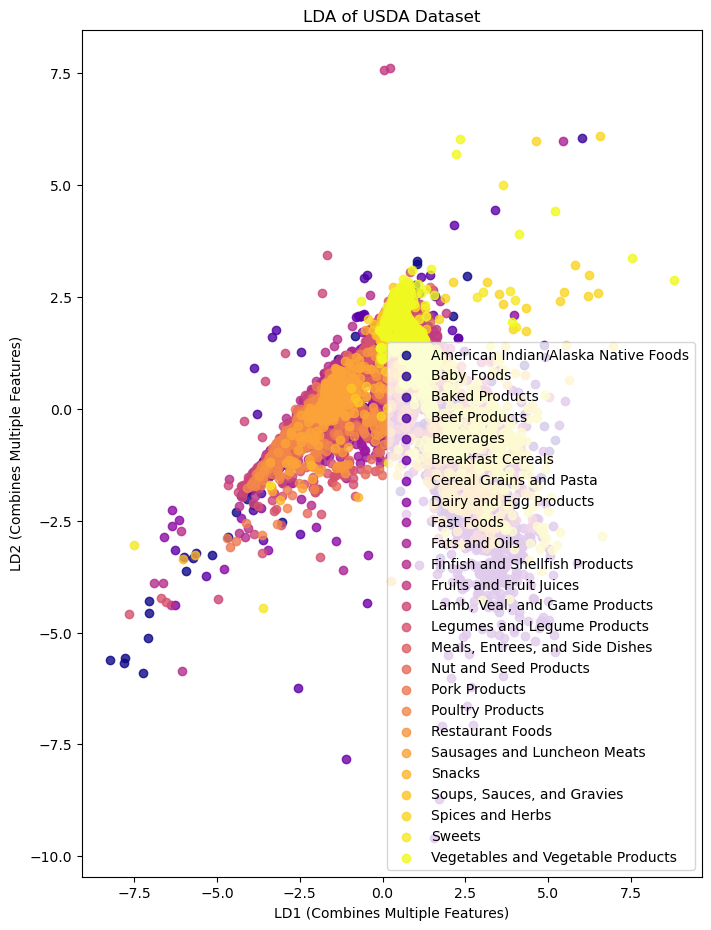

In [10]:
############################################################################
#                                                                          #
#                    Using LinearDiscriminantAnalysis                      #
#                                                                          #
############################################################################

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

lda = LinearDiscriminantAnalysis()
X_r2 = lda.fit(X, y).transform(X)

# Configure plot
# colors = ['hotpink', 'darkmagenta', 'slateblue']
# plt.figure()
colors = ['darkmagenta', 'slateblue', 'pink', 'red']
plt.figure(figsize=(8, 11))
class_labels = np.arange(len(encoder.classes_))
cmap = plt.cm.get_cmap('plasma')  
color_norm = plt.Normalize(vmin=0, vmax=len(encoder.classes_) - 1)
colors = cmap(color_norm(range(len(encoder.classes_))))

# Loop through each class and its corresponding color and label for plotting
# for color, i, target_name in zip(colors, [0, 1, 2], X.columns):
for color, i, target_name in zip(colors, class_labels, encoder.classes_):
    # Scatter plot of the reduced data points, colored by class
    # 'y == i' selects data points belonging to class i
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color, label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of USDA Dataset')
plt.xlabel("LD1 (Combines Multiple Features)")
plt.ylabel("LD2 (Combines Multiple Features)")
plt.show()

#
# Linear Discriminant Analysis Analysis:
#
# LDA is a dimensionality reduction technique similar to PDA, except LDA works to find the
# directions which best separate different classes in the data. It does this by using class
# labels. By leveraging these class labels, LDA is able to project the data onto new dimensions
# that maximize the separation between these classes, while minimizing the variation in each class.
# These new dimensions are called dicriminant functions. Thus, LDA's main functionality is to 
# maximize class separation, with dimensionality reduction occuring as a side-effect. By 
# projecting the data onto the directions that are most discriminitive, LDA reduces the number
# of features needed to effectively represent the data.
#
# LDA works by initializing random probabilities, then performing expectation maximization algorithm
# on these probabilities until they converge. This is done by calculating the expected topic 
# assignments for each word in the document, then updating the probability distributions to better
# reflect the expected topic assignment results. The final document-topic distribution effectively
# represents each document in a lower dimensional space.
#
# Note that LDA is typically used for textual data.
#
# Interpretation:
#
# While my PCA assignment did not show discrete classes in any way, this assignment does show
# some distinction between the three classes plotted. This suggests that there was some
# success in the LDA.
#